In [ ]:
!pip install pyarc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install autofeat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##PART 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from pyarc import CBA, TransactionDB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from autofeat import FeatureSelector
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

###1.1 Convert Categorical columns to numeric values

In [ ]:
#Convert Categorical columns  to numeric values
label_encoder = LabelEncoder()

data.job = label_encoder.fit_transform(data.job)
data.marital = label_encoder.fit_transform(data.marital)
data.education = label_encoder.fit_transform(data.education)
data.default = label_encoder.fit_transform(data.default)
data.housing = label_encoder.fit_transform(data.housing)
data.loan = label_encoder.fit_transform(data.loan)
data.contact = label_encoder.fit_transform(data.contact)
data.month = label_encoder.fit_transform(data.month)
data.day_of_week = label_encoder.fit_transform(data.day_of_week)
data.poutcome = label_encoder.fit_transform(data.poutcome)

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

###1.2 Scaling data

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = StandardScaler().fit_transform(X)
X

array([[ 0.38152696, -0.75798228, -0.2837415 , ...,  0.95126739,
         0.77357519,  0.84517009],
       [ 1.24515746,  1.46762984, -0.2837415 , ..., -0.32354233,
         0.23045613,  0.39811529],
       [-1.15381613,  0.07662227,  1.3585779 , ...,  0.15181045,
        -1.66757776, -2.42815683],
       ...,
       [ 0.18960908, -1.03618379,  1.3585779 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 0.76536274,  1.46762984, -0.2837415 , ...,  2.93910628,
        -1.66008249, -2.06968255],
       [-1.44169297,  1.18942833,  1.3585779 , ...,  0.88644656,
         0.713613  ,  0.33167991]])

###1.3 Feauter selection

Text(0.5, 1.0, 'Correlation ')

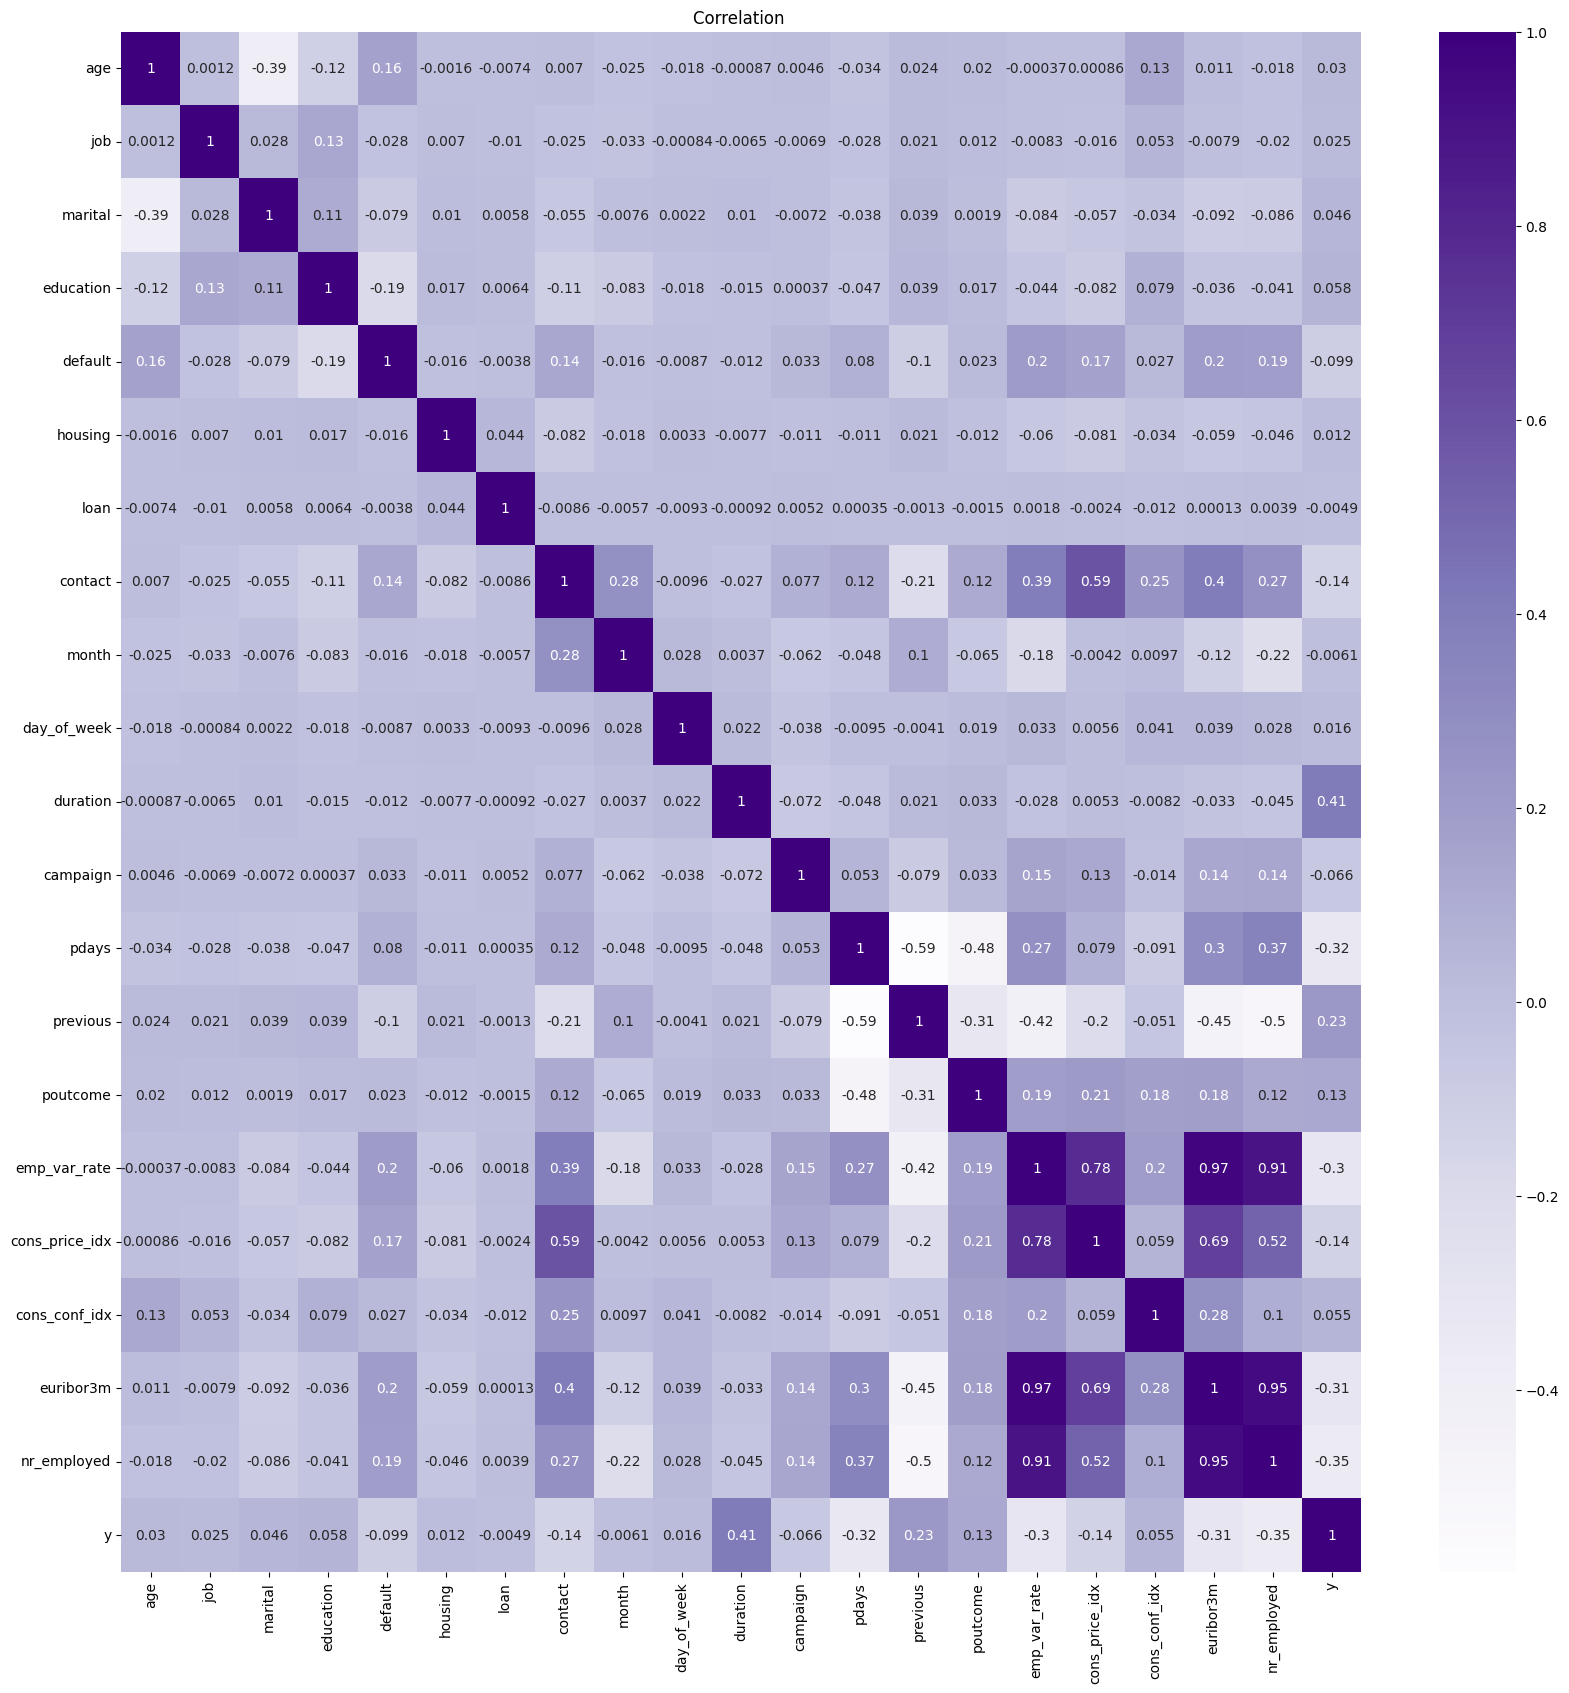

In [ ]:
corr=data.corr()
fig = plt.figure(figsize=(20,20))
r = sns.heatmap(corr, cmap='Purples' , annot=True)
r.set_title("Correlation ")

In [ ]:
corr.sort_values(by=["y"],ascending=False).iloc[0].sort_values(ascending=False)

y                 1.000000
duration          0.405274
previous          0.230181
poutcome          0.129789
education         0.057799
cons_conf_idx     0.054878
marital           0.046203
age               0.030399
job               0.025122
day_of_week       0.015967
housing           0.011552
loan             -0.004909
month            -0.006065
campaign         -0.066357
default          -0.099352
cons_price_idx   -0.136211
contact          -0.144773
emp_var_rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: y, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X = fs.fit_transform(X, y)
print(X.shape)
print()
print(X)

(41188, 10)

[[ 1.94532674 -0.75856997 -0.18623008 ... -0.2274652   0.77357519
   0.84517009]
 [-0.51359969 -0.75856997 -0.46392633 ... -0.649003    0.23045613
   0.39811529]
 [-0.51359969 -0.75856997  0.31130902 ...  0.82810692 -1.66757776
  -2.42815683]
 ...
 [ 1.94532674  1.31826996 -0.75705015 ...  0.72272247  0.71245988
   0.33167991]
 [-0.51359969  1.31826996 -0.22479901 ... -1.97753812 -1.66008249
  -2.06968255]
 [-0.51359969  1.31826996 -0.56420553 ...  0.72272247  0.713613
   0.33167991]]


###1.4 Outlier Detection

####1.4.1. Local Outlier Factor (2000)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the dataset
LOF = LocalOutlierFactor()
yhat = LOF.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
new_X, new_y = X[mask, :], y[mask]
# summarize the shape of the updated dataset
print(new_X.shape, new_y.shape)

(40122, 10) (40122,)


####1.4.2. One-Class SVM (2001)

In [ ]:
from sklearn.svm import OneClassSVM
# identify outliers in the dataset
OCS = OneClassSVM(nu=0.01)
yhat = OCS.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
new_X, new_y = X[mask, :], y[mask]
# summarize the shape of the updated dataset
print(new_X.shape, new_y.shape)

(40772, 10) (40772,)


####1.4.3. Isolation Forest (2008)

In [ ]:
from sklearn.ensemble import IsolationForest
# identify outliers in the dataset
IF = IsolationForest(contamination=0.02)
yhat = IF.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
new_X, new_y = X[mask, :], y[mask]
# summarize the shape of the updated dataset
print(new_X.shape, new_y.shape)

(40364, 10) (40364,)


####1.4.4. Minimum Covariance Determinant (2017)

In [ ]:
from sklearn.covariance import EllipticEnvelope
# identify outliers in the dataset
EE = EllipticEnvelope(contamination=0.01)
yhat = EE.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
new_X, new_y = X[mask, :], y[mask]
# summarize the shape of the updated dataset
print(new_X.shape, new_y.shape)

(40776, 10) (40776,)


##PART 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, stratify=new_y, test_size=0.4)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, stratify=y_test, test_size=0.5)
print("Shape of X_train is: ", X_train.shape)
print("Shape of y_train is: ", y_train.shape)
print("Shape of X_test is: ", X_test.shape)
print("Shape of y_test is: ", y_test.shape)
print("Shape of X_validation is: ", X_validation.shape)
print("Shape of y_validation is: ", y_validation.shape)

Shape of X_train is:  (24465, 10)
Shape of y_train is:  (24465,)
Shape of X_test is:  (8155, 10)
Shape of y_test is:  (8155,)
Shape of X_validation is:  (8156, 10)
Shape of y_validation is:  (8156,)


###SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'polynomial', 'gaussian']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_validation, y_validation)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.896 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.896 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.896 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.896 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.895 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.906 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.899 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.909 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.909 total time=   0.8s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomi

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'polynomial', 'gaussian']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [ ]:
SVM = SVC(kernel='rbf', C=1 , gamma = 0.1)
SVM.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [ ]:
y_pred = SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the SVM Model: ",accuracy)
print(classification_report(y_test,y_pred, labels=[0,1]))

Accuracy of the SVM Model:  90.86450030656039
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7257
           1       0.65      0.37      0.47       898

    accuracy                           0.91      8155
   macro avg       0.79      0.67      0.71      8155
weighted avg       0.90      0.91      0.90      8155



###MLP

In [ ]:
#Initializing the MLP
MLP = tf.keras.models.Sequential()
#Adding the input layer and the first hidden layer
MLP.add(tf.keras.layers.Dense(units=8, activation='tanh'))
#Adding the output layer
MLP.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
MLP.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
MLP.fit(X_train, y_train, batch_size = 32, epochs = 40)

Epoch 1/40
765/765 [==============================] - 3s 2ms/step - loss: 0.3520 - accuracy: 0.8603
Epoch 2/40
765/765 [==============================] - 2s 2ms/step - loss: 0.2122 - accuracy: 0.9090
Epoch 3/40
765/765 [==============================] - 2s 2ms/step - loss: 0.2038 - accuracy: 0.9122
Epoch 4/40
765/765 [==============================] - 2s 3ms/step - loss: 0.1996 - accuracy: 0.9143
Epoch 5/40
765/765 [==============================] - 3s 3ms/step - loss: 0.1963 - accuracy: 0.9147
Epoch 6/40
765/765 [==============================] - 2s 3ms/step - loss: 0.1948 - accuracy: 0.9142
Epoch 7/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1933 - accuracy: 0.9160
Epoch 8/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1925 - accuracy: 0.9151
Epoch 9/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1916 - accuracy: 0.9157
Epoch 10/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1911 - accuracy: 0.9158

In [ ]:
y_pred = MLP.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy of the MLP with 8 units is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred, labels=[0,1]))

255/255 [==============================] - 0s 1ms/step
Accuracy of the MLP with 8 units is:  0.9144083384426732
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7257
           1       0.64      0.50      0.56       898

    accuracy                           0.91      8155
   macro avg       0.79      0.73      0.76      8155
weighted avg       0.91      0.91      0.91      8155



In [ ]:
#Initializing the MLP
MLP = tf.keras.models.Sequential()
#Adding the input layer and the first hidden layer
MLP.add(tf.keras.layers.Dense(units=16, activation='tanh'))
#Adding the output layer
MLP.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
MLP.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
MLP.fit(X_train, y_train, batch_size = 32, epochs = 40)

Epoch 1/40
765/765 [==============================] - 2s 2ms/step - loss: 0.2972 - accuracy: 0.8840
Epoch 2/40
765/765 [==============================] - 2s 2ms/step - loss: 0.2049 - accuracy: 0.9102
Epoch 3/40
765/765 [==============================] - 2s 3ms/step - loss: 0.1979 - accuracy: 0.9130
Epoch 4/40
765/765 [==============================] - 3s 4ms/step - loss: 0.1947 - accuracy: 0.9138
Epoch 5/40
765/765 [==============================] - 2s 3ms/step - loss: 0.1929 - accuracy: 0.9139
Epoch 6/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1922 - accuracy: 0.9144
Epoch 7/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1910 - accuracy: 0.9142
Epoch 8/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1907 - accuracy: 0.9147
Epoch 9/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1901 - accuracy: 0.9142
Epoch 10/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1898 - accuracy: 0.9143

In [ ]:
y_pred = MLP.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy of the MLP with 16 units is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred, labels=[0,1]))

255/255 [==============================] - 2s 5ms/step
Accuracy of the MLP with 16 units is:  0.9114653586756591
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7257
           1       0.64      0.46      0.53       898

    accuracy                           0.91      8155
   macro avg       0.79      0.71      0.74      8155
weighted avg       0.90      0.91      0.91      8155



In [ ]:
#Initializing the MLP
MLP = tf.keras.models.Sequential()
#Adding the input layer and the first hidden layer
MLP.add(tf.keras.layers.Dense(units=32, activation='tanh'))
#Adding the output layer
MLP.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
MLP.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
MLP.fit(X_train, y_train, batch_size = 32, epochs = 40)

Epoch 1/40
765/765 [==============================] - 6s 6ms/step - loss: 0.2756 - accuracy: 0.8876
Epoch 2/40
765/765 [==============================] - 4s 5ms/step - loss: 0.2014 - accuracy: 0.9131
Epoch 3/40
765/765 [==============================] - 2s 3ms/step - loss: 0.1970 - accuracy: 0.9140
Epoch 4/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1940 - accuracy: 0.9149
Epoch 5/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1922 - accuracy: 0.9143
Epoch 6/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1919 - accuracy: 0.9141
Epoch 7/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1906 - accuracy: 0.9150
Epoch 8/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1899 - accuracy: 0.9144
Epoch 9/40
765/765 [==============================] - 3s 3ms/step - loss: 0.1892 - accuracy: 0.9153
Epoch 10/40
765/765 [==============================] - 3s 3ms/step - loss: 0.1887 - accuracy: 0.9154

In [ ]:
y_pred = MLP.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy of the MLP with 32 units is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred, labels=[0,1]))

255/255 [==============================] - 0s 1ms/step
Accuracy of the MLP with 32 units is:  0.9137952176578786
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7257
           1       0.63      0.52      0.57       898

    accuracy                           0.91      8155
   macro avg       0.79      0.74      0.76      8155
weighted avg       0.91      0.91      0.91      8155



In [ ]:
#Initializing the MLP
MLP = tf.keras.models.Sequential()
#Adding the input layer and the first hidden layer
MLP.add(tf.keras.layers.Dense(units=64, activation='tanh'))
#Adding the output layer
MLP.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
MLP.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
MLP.fit(X_train, y_train, batch_size = 32, epochs = 40)

Epoch 1/40
765/765 [==============================] - 2s 2ms/step - loss: 0.2569 - accuracy: 0.8993
Epoch 2/40
765/765 [==============================] - 2s 2ms/step - loss: 0.2008 - accuracy: 0.9133
Epoch 3/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1956 - accuracy: 0.9142
Epoch 4/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1937 - accuracy: 0.9122
Epoch 5/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1923 - accuracy: 0.9138
Epoch 6/40
765/765 [==============================] - 2s 3ms/step - loss: 0.1918 - accuracy: 0.9133
Epoch 7/40
765/765 [==============================] - 2s 3ms/step - loss: 0.1910 - accuracy: 0.9138
Epoch 8/40
765/765 [==============================] - 2s 3ms/step - loss: 0.1906 - accuracy: 0.9146
Epoch 9/40
765/765 [==============================] - 2s 2ms/step - loss: 0.1898 - accuracy: 0.9149
Epoch 10/40
765/765 [==============================] - 2s 3ms/step - loss: 0.1894 - accuracy: 0.9140

In [ ]:
y_pred = MLP.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy of the MLP with 64 units is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred, labels=[0,1]))

255/255 [==============================] - 0s 1ms/step
Accuracy of the MLP with 64 units is:  0.9133047210300429
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7257
           1       0.63      0.53      0.57       898

    accuracy                           0.91      8155
   macro avg       0.78      0.74      0.76      8155
weighted avg       0.91      0.91      0.91      8155



###CBA

In [ ]:
data_train = pd.DataFrame(X_train, y_train)
data_validation = pd.DataFrame(X_validation, y_validation)
data_test = pd.DataFrame(X_test, y_test)

In [ ]:
txns_train = TransactionDB.from_DataFrame(data_train)
txns_validation = TransactionDB.from_DataFrame(data_validation)
txns_test = TransactionDB.from_DataFrame(data_test)

In [ ]:
support= [0.1, 0.15 ,0.2]
confidence= [0.5, 0.55, 0.6]

for s in support:
  for c in confidence:
    cba = CBA(support=s, confidence=c, algorithm="m1")
    cba.fit(txns_validation)
    accuracy = cba.rule_model_accuracy(txns_test)
    print("For Support=",s , "Confidence=",c , "score is:",accuracy)

For Support= 0.1 Confidence= 0.5 score is: 0.8886572654812999
For Support= 0.1 Confidence= 0.55 score is: 0.8886572654812999
For Support= 0.1 Confidence= 0.6 score is: 0.8886572654812999
For Support= 0.15 Confidence= 0.5 score is: 0.8889025137952177
For Support= 0.15 Confidence= 0.55 score is: 0.8889025137952177
For Support= 0.15 Confidence= 0.6 score is: 0.8889025137952177
For Support= 0.2 Confidence= 0.5 score is: 0.7990190067443287
For Support= 0.2 Confidence= 0.55 score is: 0.7990190067443287
For Support= 0.2 Confidence= 0.6 score is: 0.7990190067443287


In [ ]:
cba = CBA(support=0.1, confidence=0.5, algorithm="m1")
cba.fit(txns_train)

accuracy = cba.rule_model_accuracy(txns_test) *100
print("The accuracy score is: ", accuracy)

The accuracy score is:  88.89025137952177


##PART 3

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = StandardScaler().fit_transform(X)

###AutoFit

In [ ]:
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(pd.DataFrame(X), pd.DataFrame(y))

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 17 features after 5 feature selection runs
[featsel] 15 features after correlation filtering
[featsel] 13 features after noise filtering


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, stratify=y, test_size=0.4)
print("Shape of X_train is: ", X_train.shape)
print("Shape of y_train is: ", y_train.shape)
print("Shape of X_test is: ", X_test.shape)
print("Shape of y_test is: ", y_test.shape)

Shape of X_train is:  (24712, 13)
Shape of y_train is:  (24712,)
Shape of X_test is:  (16476, 13)
Shape of y_test is:  (16476,)


###Logistic regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print("The accuracy of Logistic Regression is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred, labels=[0,1]))

The accuracy of Logistic Regression is:  0.9107186210245205
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14620
           1       0.66      0.42      0.51      1856

    accuracy                           0.91     16476
   macro avg       0.80      0.70      0.73     16476
weighted avg       0.90      0.91      0.90     16476



In [ ]:
#from autofeat import AutoFeatClassifier
#model = AutoFeatClassifier()
#new_X_train = model.fit_transform(X_train, y_train)
#new_X_test = model.transform(X_test, y_test)

#logreg = LogisticRegression()
#logreg.fit(new_X_train, y_train)
#y_pred = logreg.predict(new_X_test)
#print("The accuracy of Logistic Regression is: ", accuracy_score(y_test, y_pred))